In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from pycovid import pycovid


In [3]:
# pycovid.plot_countries()

In [4]:
df = pycovid.getCovidCases()

In [5]:
df.head()

,province_state,country_region,lat,long,date,cases,type,name,alpha-3
0,NaN,Afghanistan,33.0,65.0,2020-01-22,0,confirmed,Afghanistan,AFG
1,NaN,Afghanistan,33.0,65.0,2020-01-23,0,confirmed,Afghanistan,AFG
2,NaN,Afghanistan,33.0,65.0,2020-01-24,0,confirmed,Afghanistan,AFG
3,NaN,Afghanistan,33.0,65.0,2020-01-25,0,confirmed,Afghanistan,AFG
4,NaN,Afghanistan,33.0,65.0,2020-01-26,0,confirmed,Afghanistan,AFG


/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


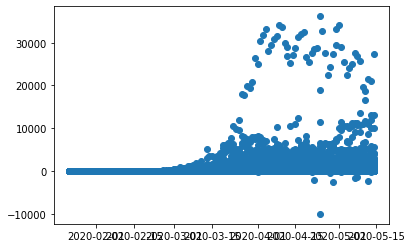

In [6]:
plt.scatter(df.date, df.cases)

In [7]:
df.groupby('type').cases.sum()

type
confirmed    4069677
death         261694
recovered    1468827
Name: cases, dtype: int64

In [8]:
df.name

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
67939      Australia
67940      Australia
67941      Australia
67942      Australia
67943      Australia
Name: name, Length: 67944, dtype: object

In [9]:
mask = (df.country_region=='US')

In [10]:
df = df[mask]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 59508 to 59849
Data columns (total 9 columns):
province_state    0 non-null object
country_region    342 non-null object
lat               342 non-null float64
long              342 non-null float64
date              342 non-null datetime64[ns]
cases             342 non-null int64
type              342 non-null object
name              342 non-null object
alpha-3           342 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 26.7+ KB


In [12]:
df = pd.read_excel('Texas_COVID-19_Fatality_Count_Data_by_County.xlsx')

In [13]:
df.head()

,County\nName,Population,Fatalities\n03-04,Fatalities\n03-05,Fatalities\n03-06,Fatalities\n03-07,Fatalities\n03-08,Fatalities\n03-09,Fatalities\n03-10,Fatalities\n03-11,...,Fatalities\n05-05,Fatalities\n05-06,Fatalities\n05-07,Fatalities\n05-08,Fatalities\n05-09,Fatalities\n05-10,Fatalities\n05-11,Fatalities\n05-12,Fatalities\n05-13,Fatalities\n05-14
0,Anderson,62245,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Andrews,17487,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Angelina,94245,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,Aransas,26041,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Archer,9847,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.shape

(254, 74)

In [15]:
# for col in df.columns:
#     df[col] = df[col].replace('\n', '')

In [16]:
# df.rename(columns = {'Fatalities\n03-04': '03-04'})

In [17]:
cols = df.columns.to_list()
cols = cols[2:]
cols[:5]

['Fatalities\n03-04',
 'Fatalities\n03-05',
 'Fatalities\n03-06',
 'Fatalities\n03-07',
 'Fatalities\n03-08']

In [18]:
df.rename(columns=lambda x: x[-5:] if x in cols else x, inplace=True,)


In [19]:
df = df.rename(columns = {'County\nName':'county_name'})

In [20]:
df.head()

,county_name,Population,03-04,03-05,03-06,03-07,03-08,03-09,03-10,03-11,...,05-05,05-06,05-07,05-08,05-09,05-10,05-11,05-12,05-13,05-14
0,Anderson,62245,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Andrews,17487,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Angelina,94245,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,Aransas,26041,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Archer,9847,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
add_list = df.columns[2:]
add_list

Index(['03-04', '03-05', '03-06', '03-07', '03-08', '03-09', '03-10', '03-11',
       '03-12', '03-13', '03-14', '03-15', '03-16', '03-17', '03-18', '03-19',
       '03-20', '03-21', '03-22', '03-23', '03-24', '03-25', '03-26', '03-27',
       '03-28', '03-29', '03-30', '03-31', '04-01', '04-02', '04-03', '04-04',
       '04-05', '04-06', '04-07', '04-08', '04-09', '04-10', '04-11', '04-12',
       '04-13', '04-14', '04-15', '04-16', '04-17', '04-18', '04-19', '04-20',
       '04-21', '04-22', '04-23', '04-24', '04-25', '04-26', '04-27', '04-28',
       '04-29', '04-30', '05-01', '05-02', '05-03', '05-04', '05-05', '05-06',
       '05-07', '05-08', '05-09', '05-10', '05-11', '05-12', '05-13', '05-14'],
      dtype='object')

In [31]:
df['total_deaths_by_county'] = df.iloc[2:].sum(axis=1)

In [33]:
df

,county_name,Population,03-04,03-05,03-06,03-07,03-08,03-09,03-10,03-11,...,05-06,05-07,05-08,05-09,05-10,05-11,05-12,05-13,05-14,total_deaths_by_county
0,Anderson,62245,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,Andrews,17487,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,Angelina,94245,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,94248.0
3,Aransas,26041,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26041.0
4,Archer,9847,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9847.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Wood,48594,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48594.0
250,Yoakum,9591,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9591.0
251,Young,19914,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,19944.0
252,Zapata,17043,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17043.0


In [34]:
df.isnull().sum()

county_name               0
Population                0
03-04                     0
03-05                     0
03-06                     0
                         ..
05-11                     0
05-12                     0
05-13                     0
05-14                     0
total_deaths_by_county    2
Length: 75, dtype: int64

In [35]:
df.fillna(0)

,county_name,Population,03-04,03-05,03-06,03-07,03-08,03-09,03-10,03-11,...,05-06,05-07,05-08,05-09,05-10,05-11,05-12,05-13,05-14,total_deaths_by_county
0,Anderson,62245,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,Andrews,17487,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,Angelina,94245,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,94248.0
3,Aransas,26041,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26041.0
4,Archer,9847,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9847.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Wood,48594,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48594.0
250,Yoakum,9591,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9591.0
251,Young,19914,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,19944.0
252,Zapata,17043,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17043.0
